# Entrainement

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [18]:
train=pd.read_csv('Base.csv')
train=train.drop('Unnamed: 0',axis=1)

In [19]:

#train =train[train['duree_pret_souhaitee']<70]
#train =train[train['montant_sollicite']<3000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
#train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_montant'] = ((train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite'])/train['montant_sollicite']
train=train.drop('nbr_credits_rembourses',axis=1)


In [20]:
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']

In [21]:
#train=train.drop('montant_credits_accorde',axis=1)
#X=X.drop('montant_sollicite',axis=1)
#X=X.drop('duree_pret_souhaitee',axis=1)
#X=X.drop('nbr_mois_cotisation',axis=1)
#X=X.drop('nbr_credits_octroyes',axis=1)
#X=X.drop('nbr_credits_rembourses',axis=1)
#X=X.drop('anciennete_agence',axis=1)
#X=X.drop('nbr_echeances',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('r',axis=1)
X=X.drop('secteur_activite',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('ssecteur_activite',axis=1)
X=X.drop('age',axis=1)
X=X.drop('duree_pret_souhaitee',axis=1)

In [22]:
#X.anciennete_agence.unique()

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("XG Boost", XGBClassifier()))
models.append(("AdaBoost",AdaBoostClassifier()))
scoring='accuracy'
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score

# Supposons que vos données sont déjà chargées dans train_X, train_y, test_X, test_y

# Normalisation
min_max_scaler = MinMaxScaler()
train_X_normalized = min_max_scaler.fit_transform(train_X)
test_X_normalized = min_max_scaler.transform(test_X)

# Standardisation
standard_scaler =  RobustScaler()
train_X_standardized = standard_scaler.fit_transform(train_X)
test_X_standardized = standard_scaler.transform(test_X)

# Entraîner un modèle XGBoost sans transformation
model = xgb.XGBClassifier()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(f"Accuracy sans transformation: {accuracy_score(test_y, y_pred)}")

# Entraîner un modèle XGBoost avec normalisation
model.fit(train_X_normalized, train_y)
y_pred_normalized = model.predict(test_X_normalized)
print(f"Accuracy avec normalisation: {accuracy_score(test_y, y_pred_normalized)}")

# Entraîner un modèle XGBoost avec standardisation
model.fit(train_X_standardized, train_y)
y_pred_standardized = model.predict(test_X_standardized)
print(f"Accuracy avec standardisation: {accuracy_score(test_y, y_pred_standardized)}")


Accuracy sans transformation: 0.948318293683347
Accuracy avec normalisation: 0.948318293683347
Accuracy avec standardisation: 0.948318293683347


In [26]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod1= XGBClassifier()
#mod1=AdaBoostClassifier()
mod1.fit(train_X,train_y)
y_pred = mod1.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3114
           1       0.87      0.77      0.82       543

    accuracy                           0.95      3657
   macro avg       0.91      0.88      0.89      3657
weighted avg       0.95      0.95      0.95      3657



In [27]:
test_X.columns

Index(['anciennete_agence', 'montant_sollicite', 'nbr_echeances',
       'taux_interet', 'nbr_mois_cotisation', 'nbr_credits_octroyes',
       'montant_credits_accorde', 'rapport_rembourse', 'rapport_montant'],
      dtype='object')

In [28]:
from sklearn.model_selection import  GridSearchCV
import time
# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000],
    
    
}

# Création de l'objet GridSearch

model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle avec GridSearch
grid_search.fit(train_X, train_y)

# Calcul du temps d'exécution
execution_time = time.time() - start_time

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [13]:
# Affichage des meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Affichage du temps d'exécution
print("Temps d'exécution: %.2f secondes" % execution_time)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}
Temps d'exécution: 175.69 secondes


In [14]:

# Utilisation du meilleur modèle trouvé pour la prédiction
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(train_X)
y_test_pred = best_model.predict(test_X)

In [15]:
from sklearn.metrics import classification_report
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(train_y, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(test_y, y_test_pred))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7183
           1       0.93      0.84      0.88      1347

    accuracy                           0.96      8530
   macro avg       0.95      0.91      0.93      8530
weighted avg       0.96      0.96      0.96      8530


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3114
           1       0.88      0.76      0.82       543

    accuracy                           0.95      3657
   macro avg       0.92      0.87      0.89      3657
weighted avg       0.95      0.95      0.95      3657



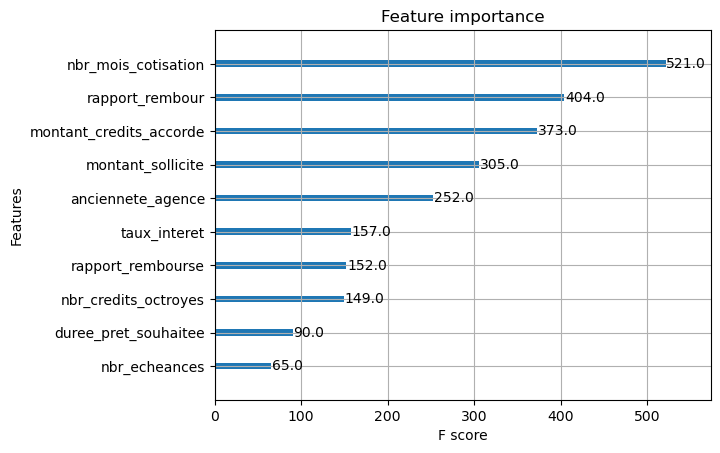

                   Feature  Importance
8        rapport_rembourse    0.439925
2     duree_pret_souhaitee    0.214918
5      nbr_mois_cotisation    0.093978
4             taux_interet    0.076374
3            nbr_echeances    0.043002
6     nbr_credits_octroyes    0.040568
9          rapport_rembour    0.034539
0        anciennete_agence    0.020579
7  montant_credits_accorde    0.018484
1        montant_sollicite    0.017635


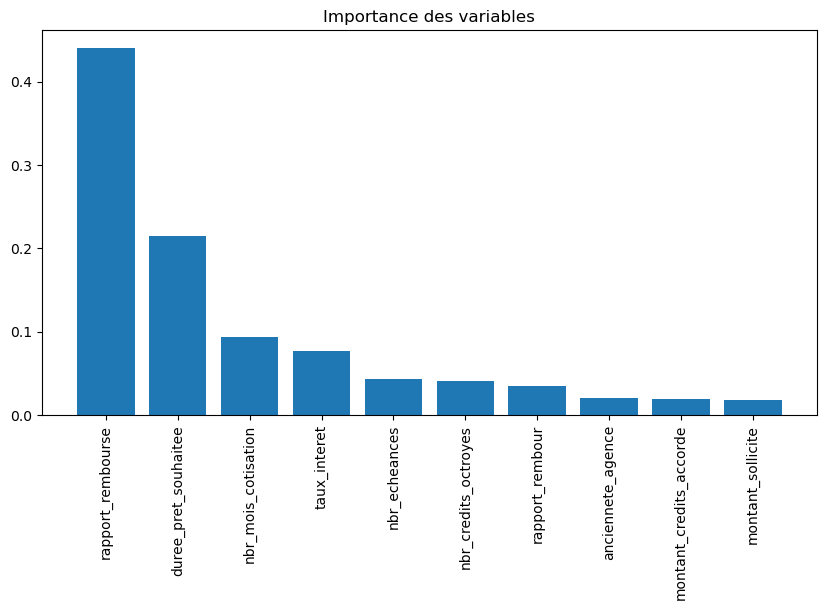

In [186]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Entraîner un modèle XGBoost
model = xgb.XGBClassifier()
model.fit(train_X, train_y)

# Afficher l'importance des caractéristiques
plot_importance(model)
plt.show()

# Récupérer les caractéristiques les plus importantes
importances = model.feature_importances_
features = train_X.columns

# Créer un DataFrame pour mieux visualiser
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Affichage de l'importance des variables pour le modèle non transformé
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Importance des variables")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), features[indices], rotation=90)
plt.show()


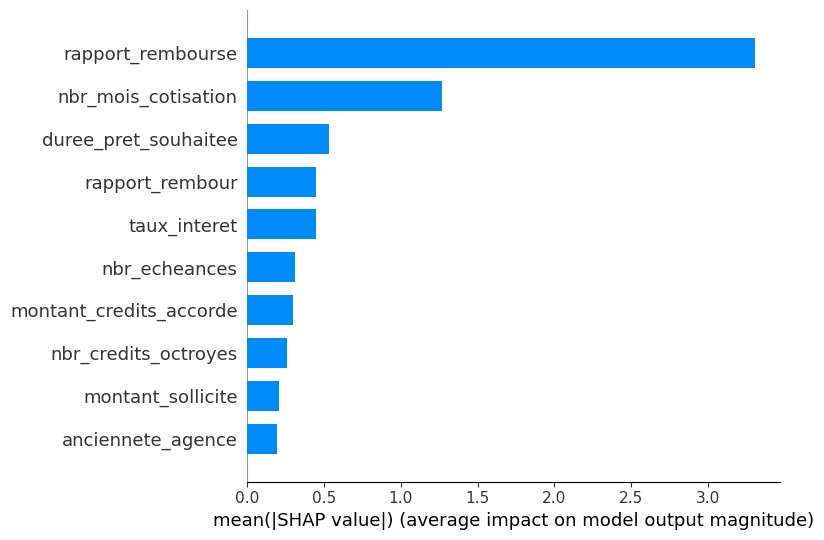

In [188]:
import shap
# Création de l'objet explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(train_X)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values, train_X, plot_type="bar")

# Afficher le graphique
plt.show()

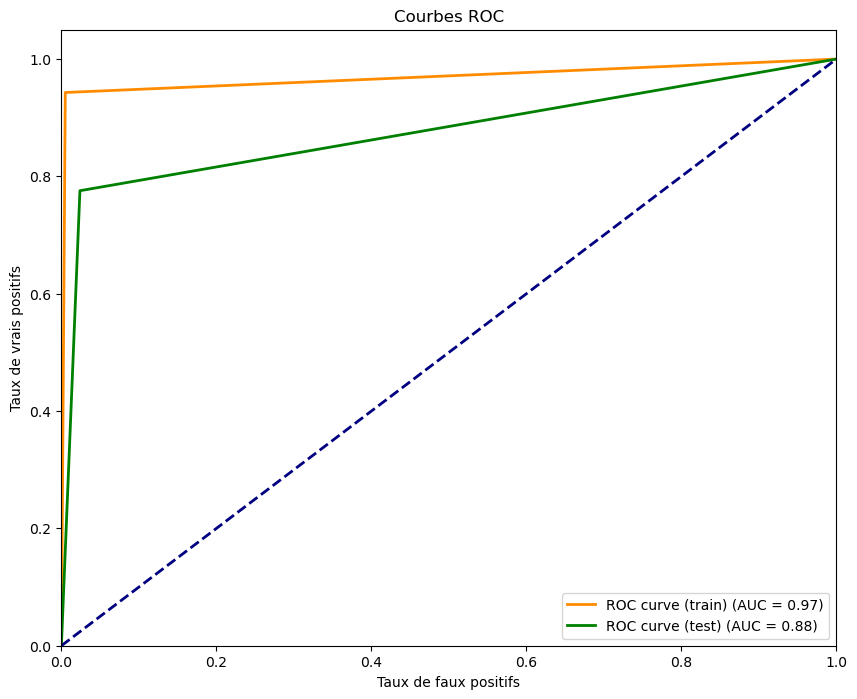

In [189]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
result=mod1
y_train_pred = result.predict(train_X)
y_test_pred = result.predict(test_X)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(train_y, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(test_y, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [190]:
# Importance des variables
importance_scores = best_model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)



                   feature  importance
8        rapport_rembourse    0.447866
2     duree_pret_souhaitee    0.209968
5      nbr_mois_cotisation    0.113261
4             taux_interet    0.068763
9          rapport_rembour    0.038856
6     nbr_credits_octroyes    0.036463
3            nbr_echeances    0.034093
0        anciennete_agence    0.019213
7  montant_credits_accorde    0.017529
1        montant_sollicite    0.013989


In [16]:
X.columns

Index(['anciennete_agence', 'montant_sollicite', 'nbr_echeances',
       'taux_interet', 'nbr_mois_cotisation', 'nbr_credits_octroyes',
       'montant_credits_accorde', 'rapport_rembourse', 'rapport_montant'],
      dtype='object')

In [192]:
best_model.predict_proba

<bound method XGBClassifier.predict_proba of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [193]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 22:26:21,829] A new study created in memory with name: no-name-525d9080-c821-44d1-b42a-c1e6c2c0f311
[I 2024-07-13 22:26:22,027] Trial 0 finished with value: 0.9354581509239056 and parameters: {'max_depth': 2, 'learning_rate': 0.08461626269488381, 'n_estimators': 60, 'subsample': 0.9089462079716151, 'colsample_bytree': 0.9597661346131255, 'lambda': 0.829841815259935, 'alpha': 0.6674069476716332}. Best is trial 0 with value: 0.9354581509239056.
[I 2024-07-13 22:26:22,662] Trial 1 finished with value: 0.9425489593688967 and parameters: {'max_depth': 6, 'learning_rate': 0.031063933384296527, 'n_estimators': 182, 'subsample': 0.718532188964019, 'colsample_bytree': 0.5507994035605204, 'lambda': 0.7308262096262085, 'alpha': 0.41178797033005865}. Best is trial 1 with value: 0.9425489593688967.
[I 2024-07-13 22:26:23,104] Trial 2 finished with value: 0.9458643949581446 and parameters: {'max_depth': 2, 'learning_rate': 0.2617656572972166, 'n_estimators': 193, 'subsample': 0.8473793

[I 2024-07-13 22:26:36,097] Trial 24 finished with value: 0.9452070097815806 and parameters: {'max_depth': 6, 'learning_rate': 0.0344082895397194, 'n_estimators': 117, 'subsample': 0.9173685984817059, 'colsample_bytree': 0.9381061586805203, 'lambda': 0.10884512085573196, 'alpha': 0.4272015094687384}. Best is trial 13 with value: 0.947776560271079.
[I 2024-07-13 22:26:36,915] Trial 25 finished with value: 0.94286506409211 and parameters: {'max_depth': 8, 'learning_rate': 0.13603883545508955, 'n_estimators': 163, 'subsample': 0.652438881866318, 'colsample_bytree': 0.9326704011560039, 'lambda': 0.2882098515192771, 'alpha': 0.30856405342291493}. Best is trial 13 with value: 0.947776560271079.
[I 2024-07-13 22:26:37,555] Trial 26 finished with value: 0.9466978850385537 and parameters: {'max_depth': 9, 'learning_rate': 0.06887835581886692, 'n_estimators': 102, 'subsample': 0.5953733276737897, 'colsample_bytree': 0.9663948995591515, 'lambda': 0.16885536876233495, 'alpha': 0.4700151378658307}.

[I 2024-07-13 22:26:44,869] Trial 48 finished with value: 0.9485974126251361 and parameters: {'max_depth': 3, 'learning_rate': 0.27940806523181233, 'n_estimators': 93, 'subsample': 0.6328000927153291, 'colsample_bytree': 0.9221074518268144, 'lambda': 0.7735684583290916, 'alpha': 0.17940209360685688}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:26:45,090] Trial 49 finished with value: 0.9381615684695823 and parameters: {'max_depth': 1, 'learning_rate': 0.29789858918429846, 'n_estimators': 106, 'subsample': 0.6537874286804856, 'colsample_bytree': 0.9211976962520725, 'lambda': 0.8219242597607808, 'alpha': 0.2340950459669097}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:26:45,437] Trial 50 finished with value: 0.9437917670202851 and parameters: {'max_depth': 5, 'learning_rate': 0.27501935838860847, 'n_estimators': 96, 'subsample': 0.5224322540184358, 'colsample_bytree': 0.8912313382248487, 'lambda': 0.6817118161079412, 'alpha': 0.2010990002089439

[I 2024-07-13 22:26:53,599] Trial 72 finished with value: 0.9435414204243298 and parameters: {'max_depth': 6, 'learning_rate': 0.2238651292453718, 'n_estimators': 62, 'subsample': 0.5701553003428514, 'colsample_bytree': 0.9250984804971558, 'lambda': 0.6324130799930876, 'alpha': 0.16150850421877422}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:26:53,954] Trial 73 finished with value: 0.9435181216901916 and parameters: {'max_depth': 7, 'learning_rate': 0.253319887483368, 'n_estimators': 61, 'subsample': 0.5888360945592678, 'colsample_bytree': 0.9320251063279893, 'lambda': 0.7962480475036838, 'alpha': 0.043110254824239164}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:26:54,158] Trial 74 finished with value: 0.9409391976039113 and parameters: {'max_depth': 2, 'learning_rate': 0.23849964491615847, 'n_estimators': 53, 'subsample': 0.6376674731507919, 'colsample_bytree': 0.9037387955497551, 'lambda': 0.03871423104937853, 'alpha': 0.2573576237380574}

[I 2024-07-13 22:27:02,895] Trial 96 finished with value: 0.9469168747902847 and parameters: {'max_depth': 7, 'learning_rate': 0.20066473876219137, 'n_estimators': 53, 'subsample': 0.7095140864791676, 'colsample_bytree': 0.8553939876338066, 'lambda': 0.38821457165388706, 'alpha': 0.4296706486876175}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:27:03,235] Trial 97 finished with value: 0.9462702005277001 and parameters: {'max_depth': 4, 'learning_rate': 0.28129090389331324, 'n_estimators': 85, 'subsample': 0.702727480308248, 'colsample_bytree': 0.8951030104879694, 'lambda': 0.732721185749112, 'alpha': 0.11878187665943049}. Best is trial 37 with value: 0.9491103868693804.
[I 2024-07-13 22:27:03,660] Trial 98 finished with value: 0.9435181216901916 and parameters: {'max_depth': 8, 'learning_rate': 0.21965266579171133, 'n_estimators': 58, 'subsample': 0.7339301737937682, 'colsample_bytree': 0.9993230034777291, 'lambda': 0.14650241152488908, 'alpha': 0.08353202927816106

Best hyperparameters:  {'max_depth': 4, 'learning_rate': 0.2333186971658529, 'n_estimators': 60, 'subsample': 0.5092926411900092, 'colsample_bytree': 0.8947075719226155, 'lambda': 0.4092574827398802, 'alpha': 0.021031350494298495}
Best F1 Score:  0.9491103868693804
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3098
           1       0.87      0.79      0.83       557

    accuracy                           0.95      3655
   macro avg       0.92      0.88      0.90      3655
weighted avg       0.95      0.95      0.95      3655



In [194]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
best_params = {
    'max_depth': 6, 'learning_rate': 0.05377603618110085, 'n_estimators': 66, 'subsample': 0.6300572809942016, 'colsample_bytree': 0.9980267693595002, 'lambda': 0.44431541111857664, 'alpha': 0.6450900554076081
}
model = xgb.XGBClassifier(**best_params)
model.fit(train_X, train_y)

importances = model.feature_importances_
features = train_X.columns

# Créer un DataFrame pour mieux visualiser
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Sélectionner les 5 variables les plus importantes
top_features = importance_df['Feature'].head(5)
train_X_top = train_X[top_features]
test_X_top = test_X[top_features]


                   Feature  Importance
8        rapport_rembourse    0.473653
2     duree_pret_souhaitee    0.160110
5      nbr_mois_cotisation    0.109422
6     nbr_credits_octroyes    0.060505
4             taux_interet    0.051712
3            nbr_echeances    0.051657
9          rapport_rembour    0.041681
0        anciennete_agence    0.023140
7  montant_credits_accorde    0.015012
1        montant_sollicite    0.013107


In [195]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    #'max_depth': 3, 'learning_rate': 0.21552128414365848, 'n_estimators': 197, 'subsample': 0.8442403365178374, 'colsample_bytree': 0.8339564713754671, 'lambda': 0.41224886654377585, 'alpha': 0.6000433341080003
#'max_depth': 9, 'learning_rate': 0.06430562964500937, 'n_estimators': 110, 'subsample': 0.8620070064769113, 'colsample_bytree': 0.9478255507285523, 'lambda': 0.5023805601126564, 'alpha': 0.39637212224286883}
#'max_depth': 8, 'learning_rate': 0.07673273604335576, 'n_estimators': 111, 'subsample': 0.5270548790127724, 'colsample_bytree': 0.9330741509762083, 'lambda': 0.812727984072264, 'alpha': 0.06944423987626255}
'max_depth': 5, 'learning_rate': 0.19289303731984522, 'n_estimators': 123, 'subsample': 0.8235760223359552, 'colsample_bytree': 0.593459846746113, 'lambda': 0.0029601668782274944, 'alpha': 0.43816528122952253}
#Entraîner le modèle final avec les meilleurs hyperparamètres
mod1 = XGBClassifier(**best_params)
mod1.fit(train_X, train_y)
y_pred = mod1.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3098
           1       0.86      0.77      0.81       557

    accuracy                           0.95      3655
   macro avg       0.91      0.87      0.89      3655
weighted avg       0.94      0.95      0.94      3655



In [40]:
train =train[train['montant_sollicite']<3000000]
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

#X=X.drop('ssecteur_activite',axis=1)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod1= XGBClassifier()
mod1.fit(train_X,train_y)
y_pred = mod1.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2866
           1       0.84      0.80      0.82       497

    accuracy                           0.95      3363
   macro avg       0.90      0.89      0.89      3363
weighted avg       0.95      0.95      0.95      3363



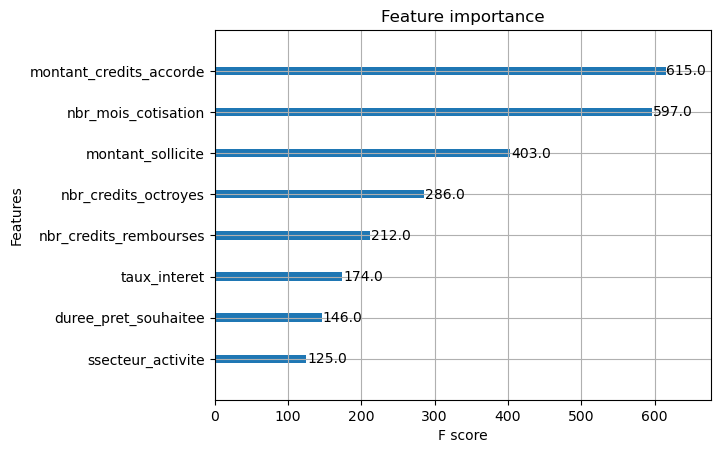

                   Feature  Importance
6   nbr_credits_rembourses    0.333001
1     duree_pret_souhaitee    0.312508
4      nbr_mois_cotisation    0.115682
2             taux_interet    0.096247
5     nbr_credits_octroyes    0.045786
3        ssecteur_activite    0.042835
0        montant_sollicite    0.031013
7  montant_credits_accorde    0.022928


In [42]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt



# Entraîner un modèle XGBoost
model = xgb.XGBClassifier()
model.fit(train_X, train_y)

# Afficher l'importance des caractéristiques
plot_importance(model)
plt.show()

# Récupérer les caractéristiques les plus importantes
importances = model.feature_importances_
features = X.columns

# Créer un DataFrame pour mieux visualiser
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


In [32]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:08:05,964] A new study created in memory with name: no-name-f0049493-7497-4b0d-83a4-61034ebf53b5
[I 2024-07-13 13:08:06,406] Trial 0 finished with value: 0.9711351429455641 and parameters: {'max_depth': 5, 'learning_rate': 0.1140017638689655, 'n_estimators': 156, 'subsample': 0.9414442884974554, 'colsample_bytree': 0.6938119777685304, 'lambda': 0.6764775227633568, 'alpha': 0.7467546585693614}. Best is trial 0 with value: 0.9711351429455641.
[I 2024-07-13 13:08:06,701] Trial 1 finished with value: 0.969618414757763 and parameters: {'max_depth': 4, 'learning_rate': 0.10725979132647182, 'n_estimators': 128, 'subsample': 0.5940866923089394, 'colsample_bytree': 0.6980315073854791, 'lambda': 0.9191250653548397, 'alpha': 0.9612548687252602}. Best is trial 0 with value: 0.9711351429455641.
[I 2024-07-13 13:08:07,423] Trial 2 finished with value: 0.9717612497250289 and parameters: {'max_depth': 9, 'learning_rate': 0.1551718247786053, 'n_estimators': 175, 'subsample': 0.76460258

[I 2024-07-13 13:08:18,821] Trial 24 finished with value: 0.971347245307574 and parameters: {'max_depth': 8, 'learning_rate': 0.2157324489496574, 'n_estimators': 145, 'subsample': 0.8553451126092253, 'colsample_bytree': 0.8852785161878833, 'lambda': 0.9079776395825674, 'alpha': 0.6880211627432649}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:19,454] Trial 25 finished with value: 0.9690439938788719 and parameters: {'max_depth': 10, 'learning_rate': 0.28204169327528383, 'n_estimators': 114, 'subsample': 0.7895674273702343, 'colsample_bytree': 0.8058892408833864, 'lambda': 0.998260669758261, 'alpha': 0.5676775113387195}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:19,921] Trial 26 finished with value: 0.9690167992084118 and parameters: {'max_depth': 7, 'learning_rate': 0.22359515301131977, 'n_estimators': 97, 'subsample': 0.7208280353063206, 'colsample_bytree': 0.8201156884302394, 'lambda': 0.5705014326526736, 'alpha': 0.8080210939068411}. B

[I 2024-07-13 13:08:33,616] Trial 48 finished with value: 0.9670516737425909 and parameters: {'max_depth': 9, 'learning_rate': 0.014373055137619134, 'n_estimators': 173, 'subsample': 0.7355692329295097, 'colsample_bytree': 0.6633218292797771, 'lambda': 0.6205631529620623, 'alpha': 0.7880821705558605}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:34,083] Trial 49 finished with value: 0.970220030307114 and parameters: {'max_depth': 4, 'learning_rate': 0.2851359082392808, 'n_estimators': 166, 'subsample': 0.930654450483635, 'colsample_bytree': 0.7089106633759538, 'lambda': 0.7694660705333025, 'alpha': 0.4871061228094894}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:34,727] Trial 50 finished with value: 0.9712106072514806 and parameters: {'max_depth': 5, 'learning_rate': 0.29939721244132406, 'n_estimators': 189, 'subsample': 0.8921792789255599, 'colsample_bytree': 0.7444070699931632, 'lambda': 0.5293691004660648, 'alpha': 0.9212320816704275}. 

[I 2024-07-13 13:08:46,912] Trial 72 finished with value: 0.9693846785009163 and parameters: {'max_depth': 5, 'learning_rate': 0.16840141620951599, 'n_estimators': 176, 'subsample': 0.841043712424187, 'colsample_bytree': 0.7498070032604914, 'lambda': 0.8286746869439203, 'alpha': 0.8809709318901737}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:47,501] Trial 73 finished with value: 0.9706108282358867 and parameters: {'max_depth': 4, 'learning_rate': 0.27329558040125235, 'n_estimators': 182, 'subsample': 0.8929632260397756, 'colsample_bytree': 0.7745777909249836, 'lambda': 0.5863320870456639, 'alpha': 0.9670436586347262}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:08:48,142] Trial 74 finished with value: 0.9713980513392474 and parameters: {'max_depth': 6, 'learning_rate': 0.10406565411056376, 'n_estimators': 166, 'subsample': 0.906260685294966, 'colsample_bytree': 0.9157862988266069, 'lambda': 0.7407987587991824, 'alpha': 0.763250749274153}. B

[I 2024-07-13 13:09:02,561] Trial 96 finished with value: 0.9683208642262393 and parameters: {'max_depth': 4, 'learning_rate': 0.288975222845246, 'n_estimators': 188, 'subsample': 0.8664454601547545, 'colsample_bytree': 0.6664336287893377, 'lambda': 0.8504804365898563, 'alpha': 0.9418301098207794}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:09:03,392] Trial 97 finished with value: 0.9702980502565505 and parameters: {'max_depth': 10, 'learning_rate': 0.2147253919998409, 'n_estimators': 164, 'subsample': 0.9092174938239613, 'colsample_bytree': 0.9453525095957751, 'lambda': 0.8181922992925831, 'alpha': 0.8109482543840013}. Best is trial 2 with value: 0.9717612497250289.
[I 2024-07-13 13:09:04,095] Trial 98 finished with value: 0.9703494092028694 and parameters: {'max_depth': 6, 'learning_rate': 0.2987474155499835, 'n_estimators': 194, 'subsample': 0.8945897587272653, 'colsample_bytree': 0.7977775573655421, 'lambda': 0.49840354872553705, 'alpha': 0.6961892328701085}. 

Best hyperparameters:  {'max_depth': 9, 'learning_rate': 0.1551718247786053, 'n_estimators': 175, 'subsample': 0.7646025844137256, 'colsample_bytree': 0.8088108516320626, 'lambda': 0.7408862137076424, 'alpha': 0.8171368075135638}
Best F1 Score:  0.9717612497250289
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2866
           1       0.93      0.88      0.90       497

    accuracy                           0.97      3363
   macro avg       0.95      0.93      0.94      3363
weighted avg       0.97      0.97      0.97      3363



In [ ]:
'max_depth': 9, 'learning_rate': 0.021599567632155852, 'n_estimators': 119, 'subsample': 0.992685142235708, 'colsample_bytree': 0.842983618254443, 'lambda': 0.18087389926715097, 'alpha': 0.812862979006105

In [74]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    'max_depth': 9, 'learning_rate': 0.021599567632155852, 'n_estimators': 119, 'subsample': 0.992685142235708, 'colsample_bytree': 0.842983618254443, 'lambda': 0.18087389926715097, 'alpha': 0.812862979006105}
    #Entraîner le modèle final avec les meilleurs hyperparamètres
mod1 = XGBClassifier(**best_params)
mod1.fit(train_X, train_y)
y_pred = mod1.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3098
           1       0.90      0.73      0.81       557

    accuracy                           0.95      3655
   macro avg       0.93      0.86      0.89      3655
weighted avg       0.95      0.95      0.94      3655



In [75]:
train_X

,anciennete_agence,duree_pret_souhaitee,taux_interet,ssecteur_activite,nbr_mois_cotisation,rapport_rembourse,rapport_rembour
4471,8.000000,12.0,19.0000,32,10.000000,0.900000,4.150000e+05
10179,4.000000,12.0,18.0000,32,11.183644,0.666667,-2.000000e+04
12020,4.000000,12.0,19.0000,19,1.000000,0.000000,-5.000000e+05
11431,9.000000,12.0,19.0000,19,9.000000,0.833333,-2.833333e+05
9962,8.196027,12.0,19.0000,32,12.000000,0.857143,-2.142857e+04
...,...,...,...,...,...,...,...
10955,8.196027,12.0,0.0000,19,11.000000,0.000000,0.000000e+00
905,8.196027,12.0,24.0000,3,12.000000,0.000000,0.000000e+00
5192,11.000000,60.0,5.7145,34,12.000000,0.978723,-1.637021e+06
12172,4.000000,12.0,19.0000,19,0.000000,0.000000,-4.000000e+06


In [67]:
train=pd.read_csv('Base.csv')
train=train.drop('Unnamed: 0',axis=1)

In [68]:
#train =train[train['duree_pret_souhaitee']<84]
#train =train[train['montant_sollicite']<1000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
#train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] / train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembour'] = (train['montant_credits_accorde']/ train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite']
train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)


In [69]:
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']

In [70]:
#X=X.drop('montant_sollicite',axis=1)
#X=X.drop('duree_pret_souhaitee',axis=1)
#X=X.drop('nbr_mois_cotisation',axis=1)
#X=X.drop('nbr_credits_octroyes',axis=1)
#X=X.drop('nbr_credits_rembourses',axis=1)
#X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
#X=X.drop('ssecteur_activite',axis=1)

In [71]:
#X=X.drop('ssecteur_activite',axis=1)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

for name,model in models:
    kfold=KFold(n_splits=10)
    #random_state=0
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))
    #La définition d'un random_state n'a aucun effet puisque shuffle est False. Vous devez laisser random_state sa valeur par défaut (Aucun) ou définir shuffle=True

In [72]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod1= XGBClassifier()
mod1.fit(train_X,train_y)
y_pred = mod1.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3098
           1       0.87      0.78      0.82       557

    accuracy                           0.95      3655
   macro avg       0.91      0.88      0.90      3655
weighted avg       0.95      0.95      0.95      3655



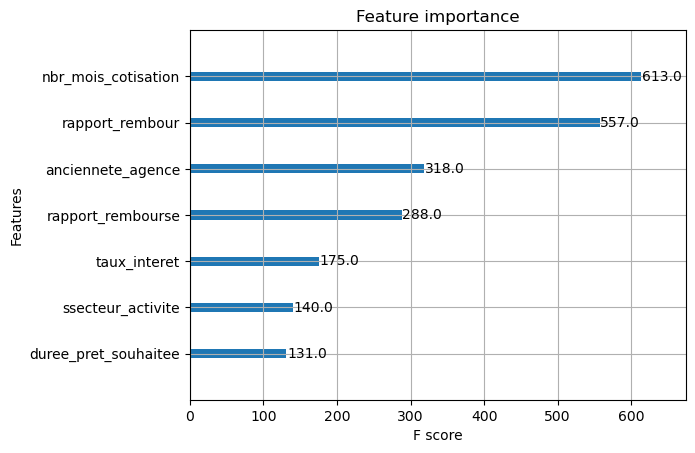

                Feature  Importance
5     rapport_rembourse    0.385124
1  duree_pret_souhaitee    0.288084
4   nbr_mois_cotisation    0.127736
2          taux_interet    0.099919
6       rapport_rembour    0.040159
3     ssecteur_activite    0.031172
0     anciennete_agence    0.027806


In [73]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt



# Entraîner un modèle XGBoost
model = xgb.XGBClassifier()
model.fit(train_X, train_y)

# Afficher l'importance des caractéristiques
plot_importance(model)
plt.show()

# Récupérer les caractéristiques les plus importantes
importances = model.feature_importances_
features = train_X.columns

# Créer un DataFrame pour mieux visualiser
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


In [46]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:16:16,557] A new study created in memory with name: no-name-1f04fe60-ccf4-4309-b6ce-0e5cafbc6a24
[I 2024-07-13 13:16:17,240] Trial 0 finished with value: 0.9678978927015244 and parameters: {'max_depth': 8, 'learning_rate': 0.17773530885119354, 'n_estimators': 161, 'subsample': 0.823791625530794, 'colsample_bytree': 0.7276939491180632, 'lambda': 0.3403544430843102, 'alpha': 0.5352599027748127}. Best is trial 0 with value: 0.9678978927015244.
[I 2024-07-13 13:16:17,549] Trial 1 finished with value: 0.969464051915995 and parameters: {'max_depth': 7, 'learning_rate': 0.2604531687829861, 'n_estimators': 74, 'subsample': 0.9186541122552649, 'colsample_bytree': 0.9573986223261731, 'lambda': 0.61239686371041, 'alpha': 0.16422045863997417}. Best is trial 1 with value: 0.969464051915995.
[I 2024-07-13 13:16:17,800] Trial 2 finished with value: 0.958301945184594 and parameters: {'max_depth': 1, 'learning_rate': 0.06504006849903127, 'n_estimators': 178, 'subsample': 0.705349969297

[I 2024-07-13 13:16:29,433] Trial 24 finished with value: 0.9697546530231534 and parameters: {'max_depth': 9, 'learning_rate': 0.0120596057895578, 'n_estimators': 125, 'subsample': 0.9537119403442239, 'colsample_bytree': 0.9082276159091369, 'lambda': 0.735150238429445, 'alpha': 0.8829441561154261}. Best is trial 21 with value: 0.9717364941341983.
[I 2024-07-13 13:16:30,143] Trial 25 finished with value: 0.9701937587640578 and parameters: {'max_depth': 10, 'learning_rate': 0.09672200909154083, 'n_estimators': 147, 'subsample': 0.651725986757985, 'colsample_bytree': 0.9956395935916741, 'lambda': 0.5250602235052825, 'alpha': 0.4748491912864913}. Best is trial 21 with value: 0.9717364941341983.
[I 2024-07-13 13:16:30,545] Trial 26 finished with value: 0.969455537221917 and parameters: {'max_depth': 6, 'learning_rate': 0.059870657324138196, 'n_estimators': 107, 'subsample': 0.7895843469820664, 'colsample_bytree': 0.6863528721815971, 'lambda': 0.3834203452781695, 'alpha': 0.2563595517501787}

[I 2024-07-13 13:16:42,968] Trial 48 finished with value: 0.962869080812873 and parameters: {'max_depth': 2, 'learning_rate': 0.14435570721618757, 'n_estimators': 142, 'subsample': 0.8690200868121337, 'colsample_bytree': 0.6101232117071248, 'lambda': 0.05805890494917676, 'alpha': 0.589724909340963}. Best is trial 21 with value: 0.9717364941341983.
[I 2024-07-13 13:16:43,278] Trial 49 finished with value: 0.9704817792103857 and parameters: {'max_depth': 6, 'learning_rate': 0.11623276959659704, 'n_estimators': 59, 'subsample': 0.5804949951569536, 'colsample_bytree': 0.8204955022589798, 'lambda': 0.37993315269910827, 'alpha': 0.40853260003058084}. Best is trial 21 with value: 0.9717364941341983.
[I 2024-07-13 13:16:43,673] Trial 50 finished with value: 0.9653824498398846 and parameters: {'max_depth': 4, 'learning_rate': 0.04574312694664128, 'n_estimators': 127, 'subsample': 0.9522148361095377, 'colsample_bytree': 0.7785848041365235, 'lambda': 0.23024163246738477, 'alpha': 0.22883565998194

[I 2024-07-13 13:16:59,763] Trial 72 finished with value: 0.9710841918795614 and parameters: {'max_depth': 9, 'learning_rate': 0.09927087457564616, 'n_estimators': 165, 'subsample': 0.7418789692658839, 'colsample_bytree': 0.9002517865962945, 'lambda': 0.6409046810473142, 'alpha': 0.535345787393302}. Best is trial 54 with value: 0.9722396903253036.
[I 2024-07-13 13:17:00,495] Trial 73 finished with value: 0.9723134932434664 and parameters: {'max_depth': 8, 'learning_rate': 0.06021403034634606, 'n_estimators': 124, 'subsample': 0.8248578797109365, 'colsample_bytree': 0.8408175611126968, 'lambda': 0.5770029016773061, 'alpha': 0.48265613077567826}. Best is trial 73 with value: 0.9723134932434664.
[I 2024-07-13 13:17:01,234] Trial 74 finished with value: 0.9719753926272225 and parameters: {'max_depth': 7, 'learning_rate': 0.05807871995591391, 'n_estimators': 175, 'subsample': 0.8409208122917957, 'colsample_bytree': 0.8409721573851586, 'lambda': 0.46264850993436724, 'alpha': 0.48144833097164

[I 2024-07-13 13:17:19,444] Trial 96 finished with value: 0.972164751455479 and parameters: {'max_depth': 9, 'learning_rate': 0.03255524753628323, 'n_estimators': 142, 'subsample': 0.8179123550908198, 'colsample_bytree': 0.9634652364707573, 'lambda': 0.6352115203736439, 'alpha': 0.3133389240390435}. Best is trial 93 with value: 0.9725291573493614.
[I 2024-07-13 13:17:20,223] Trial 97 finished with value: 0.9725045123947978 and parameters: {'max_depth': 9, 'learning_rate': 0.03181851470797687, 'n_estimators': 143, 'subsample': 0.8201194801899365, 'colsample_bytree': 0.9996470268181936, 'lambda': 0.6318607863230731, 'alpha': 0.31143233954505817}. Best is trial 93 with value: 0.9725291573493614.
[I 2024-07-13 13:17:21,004] Trial 98 finished with value: 0.971347245307574 and parameters: {'max_depth': 9, 'learning_rate': 0.0370702284450206, 'n_estimators': 151, 'subsample': 0.8428661928230758, 'colsample_bytree': 0.9385184793969454, 'lambda': 0.6332162363847224, 'alpha': 0.308944589492713}.

Best hyperparameters:  {'max_depth': 9, 'learning_rate': 0.033185833228869505, 'n_estimators': 151, 'subsample': 0.8165128906123051, 'colsample_bytree': 0.9074057455011388, 'lambda': 0.4984615512488808, 'alpha': 0.3147121593405147}
Best F1 Score:  0.9725291573493614
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2866
           1       0.94      0.87      0.91       497

    accuracy                           0.97      3363
   macro avg       0.96      0.93      0.94      3363
weighted avg       0.97      0.97      0.97      3363



In [49]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna

best_params = {
'max_depth': 9, 'learning_rate': 0.033185833228869505, 'n_estimators': 151, 'subsample': 0.8165128906123051, 'colsample_bytree': 0.9074057455011388, 'lambda': 0.4984615512488808, 'alpha': 0.3147121593405147 }
mod1 = XGBClassifier(**best_params)
mod1.fit(train_X, train_y)
y_pred = mod1.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2866
           1       0.94      0.87      0.91       497

    accuracy                           0.97      3363
   macro avg       0.96      0.93      0.94      3363
weighted avg       0.97      0.97      0.97      3363



In [ ]:
train.shape

In [ ]:
import pickle

file = './App_Model0.pkl'
with open(file, 'wb') as f:
    pickle.dump(mod1, f)

In [ ]:
train3.columns

In [87]:
train=pd.read_csv('Base.csv')
train=train.drop('Unnamed: 0',axis=1)

In [88]:

#train =train[train['duree_pret_souhaitee']<70]
train =train[train['montant_sollicite']<3000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
#train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
#train['rapport_rembour'] = (train['montant_credits_accorde']/train['nbr_credits_octroyes']) - train['montant_sollicite']
#train['montant_credits_accorde']=train['montant_credits_accorde']-train['montant_credits_accorde']
train['rapport_rembour'] = ((train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite'])/train['montant_sollicite']
#train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
#train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)
#train=train.drop('duree_pret_souhaitee',axis=1)
#
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
#
X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
#X=X.drop('ssecteur_activite',axis=1)

from sklearn.feature_selection import SelectKBest, f_classif
#
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [89]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod2= XGBClassifier()
mod2.fit(train_X,train_y)
y_pred = mod2.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2866
           1       0.88      0.82      0.85       497

    accuracy                           0.96      3363
   macro avg       0.92      0.90      0.91      3363
weighted avg       0.96      0.96      0.96      3363



In [90]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    #'max_depth': 8, 'learning_rate': 0.1521144137278809, 'n_estimators': 65, 'subsample': 0.7423868279218212, 'colsample_bytree': 0.9557791298962521, 'lambda': 0.7076288035899443, 'alpha': 0.40281399366018356}
#'max_depth': 8, 'learning_rate': 0.21948883134326383, 'n_estimators': 94, 'subsample': 0.8634912278625186, 'colsample_bytree': 0.6860639669000079, 'lambda': 0.7840423059482575, 'alpha': 0.6026120914048049}
#'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829}
#'max_depth': 10, 'learning_rate': 0.1002015553106161, 'n_estimators': 56, 'subsample': 0.9195395426805336, 'colsample_bytree': 0.9379301753651929, 'lambda': 0.05645535740960696, 'alpha': 0.8074184733833735}
    # Entraîner le modèle final avec les meilleurs hyperparamètres
    'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829}
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod3.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2866
           1       0.89      0.82      0.85       497

    accuracy                           0.96      3363
   macro avg       0.93      0.90      0.91      3363
weighted avg       0.96      0.96      0.96      3363



In [91]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    #'max_depth': 8, 'learning_rate': 0.1521144137278809, 'n_estimators': 65, 'subsample': 0.7423868279218212, 'colsample_bytree': 0.9557791298962521, 'lambda': 0.7076288035899443, 'alpha': 0.40281399366018356
#'max_depth': 8, 'learning_rate': 0.21948883134326383, 'n_estimators': 94, 'subsample': 0.8634912278625186, 'colsample_bytree': 0.6860639669000079, 'lambda': 0.7840423059482575, 'alpha': 0.6026120914048049
'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829}
#'max_depth': 10, 'learning_rate': 0.1002015553106161, 'n_estimators': 56, 'subsample': 0.9195395426805336, 'colsample_bytree': 0.9379301753651929, 'lambda': 0.05645535740960696, 'alpha': 0.8074184733833735}
    # Entraîner le modèle final avec les meilleurs hyperparamètres
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod3.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2866
           1       0.89      0.82      0.85       497

    accuracy                           0.96      3363
   macro avg       0.93      0.90      0.91      3363
weighted avg       0.96      0.96      0.96      3363



In [92]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:31:06,450] A new study created in memory with name: no-name-353f5a89-80b2-4301-8242-c12dfa21c4d6
[I 2024-07-13 13:31:06,812] Trial 0 finished with value: 0.9526584410153764 and parameters: {'max_depth': 2, 'learning_rate': 0.16083720789557235, 'n_estimators': 193, 'subsample': 0.6391889114717673, 'colsample_bytree': 0.9153978149854685, 'lambda': 0.41873305118971577, 'alpha': 0.0721275514031523}. Best is trial 0 with value: 0.9526584410153764.
[I 2024-07-13 13:31:07,069] Trial 1 finished with value: 0.9549381644548336 and parameters: {'max_depth': 4, 'learning_rate': 0.21039540265862094, 'n_estimators': 101, 'subsample': 0.9438522405339314, 'colsample_bytree': 0.7756545693803986, 'lambda': 0.9598732699228474, 'alpha': 0.2142292066041444}. Best is trial 1 with value: 0.9549381644548336.
[I 2024-07-13 13:31:07,629] Trial 2 finished with value: 0.9546575602457888 and parameters: {'max_depth': 7, 'learning_rate': 0.031239808509189726, 'n_estimators': 173, 'subsample': 0.807

[I 2024-07-13 13:31:14,535] Trial 24 finished with value: 0.9550604163245107 and parameters: {'max_depth': 4, 'learning_rate': 0.2280988031825891, 'n_estimators': 114, 'subsample': 0.8606341321786121, 'colsample_bytree': 0.5702497567858453, 'lambda': 0.1162625175241405, 'alpha': 0.15288093554622045}. Best is trial 3 with value: 0.9565348507428784.
[I 2024-07-13 13:31:15,060] Trial 25 finished with value: 0.952282004290016 and parameters: {'max_depth': 5, 'learning_rate': 0.2728033177929607, 'n_estimators': 154, 'subsample': 0.7649556685774692, 'colsample_bytree': 0.7312628424579325, 'lambda': 0.7214654335274113, 'alpha': 0.33833144289274547}. Best is trial 3 with value: 0.9565348507428784.
[I 2024-07-13 13:31:15,401] Trial 26 finished with value: 0.955906155862926 and parameters: {'max_depth': 8, 'learning_rate': 0.12481290113627325, 'n_estimators': 64, 'subsample': 0.9407763435842429, 'colsample_bytree': 0.6628247221420219, 'lambda': 0.2779034470530228, 'alpha': 0.09227968061290437}. 

[I 2024-07-13 13:31:24,140] Trial 48 finished with value: 0.9544167948148444 and parameters: {'max_depth': 4, 'learning_rate': 0.21105360406914347, 'n_estimators': 81, 'subsample': 0.8324875488306932, 'colsample_bytree': 0.7956707435092294, 'lambda': 0.33007395871556766, 'alpha': 0.17640367926096517}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:24,472] Trial 49 finished with value: 0.9509683327278748 and parameters: {'max_depth': 6, 'learning_rate': 0.27162809601911564, 'n_estimators': 57, 'subsample': 0.7603642965395094, 'colsample_bytree': 0.9116208202473245, 'lambda': 0.17351607566209967, 'alpha': 0.5757480916238678}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:24,645] Trial 50 finished with value: 0.9468502527384413 and parameters: {'max_depth': 3, 'learning_rate': 0.16541690531010142, 'n_estimators': 50, 'subsample': 0.84096632612939, 'colsample_bytree': 0.7390188193149347, 'lambda': 0.031232711571556368, 'alpha': 0.913767739452426

[I 2024-07-13 13:31:32,487] Trial 72 finished with value: 0.9550202686269764 and parameters: {'max_depth': 5, 'learning_rate': 0.1739413988394475, 'n_estimators': 102, 'subsample': 0.8519891817713414, 'colsample_bytree': 0.9580507453546299, 'lambda': 0.1449356310227039, 'alpha': 0.24779029721991172}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:32,843] Trial 73 finished with value: 0.9564971443151496 and parameters: {'max_depth': 4, 'learning_rate': 0.2032928891975362, 'n_estimators': 111, 'subsample': 0.8815016529901157, 'colsample_bytree': 0.9971219579120647, 'lambda': 0.07476247820310272, 'alpha': 0.114468615510079}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:33,191] Trial 74 finished with value: 0.9553421105233145 and parameters: {'max_depth': 4, 'learning_rate': 0.20685101117877067, 'n_estimators': 114, 'subsample': 0.8358938879423001, 'colsample_bytree': 0.9977252408098075, 'lambda': 0.06043336733723477, 'alpha': 0.187904027868608

[I 2024-07-13 13:31:42,236] Trial 96 finished with value: 0.9542166371426387 and parameters: {'max_depth': 5, 'learning_rate': 0.15925932559556344, 'n_estimators': 123, 'subsample': 0.8381973952561261, 'colsample_bytree': 0.9973173898826319, 'lambda': 0.04964738185117322, 'alpha': 0.4865103771400683}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:42,886] Trial 97 finished with value: 0.9524932560979078 and parameters: {'max_depth': 10, 'learning_rate': 0.18210916544629685, 'n_estimators': 131, 'subsample': 0.79602512857032, 'colsample_bytree': 0.9190550211497165, 'lambda': 0.07584107754350577, 'alpha': 0.7074745850746278}. Best is trial 32 with value: 0.9589262821736847.
[I 2024-07-13 13:31:43,242] Trial 98 finished with value: 0.953776867540599 and parameters: {'max_depth': 5, 'learning_rate': 0.13488659829551192, 'n_estimators': 99, 'subsample': 0.9561791433896691, 'colsample_bytree': 0.6316597545780844, 'lambda': 0.6157628192662137, 'alpha': 0.6117292777015063

Best hyperparameters:  {'max_depth': 8, 'learning_rate': 0.11070718181817646, 'n_estimators': 64, 'subsample': 0.9561542767562008, 'colsample_bytree': 0.7267897636590696, 'lambda': 0.15461938822977284, 'alpha': 0.061605538041775584}
Best F1 Score:  0.9589262821736847
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2866
           1       0.88      0.82      0.85       497

    accuracy                           0.96      3363
   macro avg       0.92      0.90      0.91      3363
weighted avg       0.96      0.96      0.96      3363



In [ ]:
d=[[1,12,18,19,10,0.5,-1000000]]
dm=[[12,18,19,18,0.75,-10000000000]]
mod3.predict(d)

In [ ]:
A=train6[train6.nbr_credits_octroyes ==0]
A=A[A.montant_sollicite==A.montant_credits_accorde]
A

In [69]:
train.columns

Index(['Unnamed: 0', 'r', 'profession', 'age', 'sexe', 'anciennete_agence',
       'duree_pret_souhaitee', 'nbr_echeances', 'taux_interet',
       'secteur_activite', 'ssecteur_activite', 'nbr_mois_cotisation',
       'a_dette_encours', 'nbr_credits_octroyes', 'rapport_rembourse',
       'rapport_rembour'],
      dtype='object')

In [96]:
train=pd.read_csv('Base.csv')
train=train.drop('Unnamed: 0',axis=1)

In [97]:

#train =train[train['duree_pret_souhaitee']<84]
train =train[train['montant_sollicite']<3000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
#train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
#train['rapport_rembour'] = (train['montant_credits_accorde']/train['nbr_credits_octroyes']) - train['montant_sollicite']
train['rapport_rembour'] = ((train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite'])
#train['rapport_rembour'] = (train['montant_sollicite']-((train['montant_credits_accorde']- train['montant_sollicite'])/train['nbr_credits_octroyes'].replace(0, 1))  )/((train['montant_credits_accorde']- train['montant_sollicite'])/train['nbr_credits_octroyes'].replace(0, 1)).replace(0, 1) 
#train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)
#train=train.drop('duree_pret_souhaitee',axis=1)
#
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
#
X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
#X=X.drop('ssecteur_activite',axis=1)
from sklearn.feature_selection import SelectKBest, f_classif
#
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
# Standardisation des données
# Normaliser les données
scaler =  RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [98]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod2= XGBClassifier()
mod2.fit(train_X,train_y)
y_pred = mod2.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2866
           1       0.86      0.81      0.84       497

    accuracy                           0.95      3363
   macro avg       0.91      0.90      0.90      3363
weighted avg       0.95      0.95      0.95      3363



In [99]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
  #'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829} 
 'max_depth': 8, 'learning_rate': 0.21948883134326383, 'n_estimators': 94, 'subsample': 0.8634912278625186, 'colsample_bytree': 0.6860639669000079, 'lambda': 0.7840423059482575, 'alpha': 0.6026120914048049
}
   
    # Entraîner le modèle final avec les meilleurs hyperparamètres
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod3.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2866
           1       0.87      0.81      0.84       497

    accuracy                           0.95      3363
   macro avg       0.92      0.90      0.91      3363
weighted avg       0.95      0.95      0.95      3363



In [ ]:
dm=[[2000000000000,12,18,19,18,3,0.7,-100]]
dm=[[12,18,19,18,18,0.75,-10000000000]]
mod3.predict(dm)

In [ ]:
X.columns

In [100]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:32:34,342] A new study created in memory with name: no-name-d25e0454-4bd2-4cac-8ef3-5548b23985dc
[I 2024-07-13 13:32:34,536] Trial 0 finished with value: 0.9483290952415425 and parameters: {'max_depth': 3, 'learning_rate': 0.1084312740098363, 'n_estimators': 66, 'subsample': 0.5312383583766247, 'colsample_bytree': 0.9631924683530338, 'lambda': 0.47745911840540106, 'alpha': 0.22433653811747678}. Best is trial 0 with value: 0.9483290952415425.
[I 2024-07-13 13:32:34,716] Trial 1 finished with value: 0.9521415584481449 and parameters: {'max_depth': 5, 'learning_rate': 0.1977210699411489, 'n_estimators': 52, 'subsample': 0.859067925599911, 'colsample_bytree': 0.8200417331268814, 'lambda': 0.09833755383564256, 'alpha': 0.7400306200111051}. Best is trial 1 with value: 0.9521415584481449.
[I 2024-07-13 13:32:35,120] Trial 2 finished with value: 0.9550604163245107 and parameters: {'max_depth': 4, 'learning_rate': 0.1646792161409433, 'n_estimators': 146, 'subsample': 0.81687086

[I 2024-07-13 13:32:47,171] Trial 24 finished with value: 0.9541763596771615 and parameters: {'max_depth': 5, 'learning_rate': 0.08302471430453257, 'n_estimators': 162, 'subsample': 0.9458547452759746, 'colsample_bytree': 0.6830472290975241, 'lambda': 0.2553386217685669, 'alpha': 0.28850463705868046}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:32:47,650] Trial 25 finished with value: 0.9550165738304386 and parameters: {'max_depth': 7, 'learning_rate': 0.10164488740511782, 'n_estimators': 133, 'subsample': 0.9076381424374721, 'colsample_bytree': 0.5929422462042414, 'lambda': 0.5355623986672691, 'alpha': 0.0019171613405561394}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:32:48,069] Trial 26 finished with value: 0.9536172593787694 and parameters: {'max_depth': 4, 'learning_rate': 0.18392356424473832, 'n_estimators': 152, 'subsample': 0.9616767983155176, 'colsample_bytree': 0.527290289357713, 'lambda': 0.0852600882650631, 'alpha': 0.530302270991

[I 2024-07-13 13:33:01,675] Trial 48 finished with value: 0.9528146314464359 and parameters: {'max_depth': 9, 'learning_rate': 0.027236744733395594, 'n_estimators': 181, 'subsample': 0.7570151629966377, 'colsample_bytree': 0.8701940954979661, 'lambda': 0.13186351577170774, 'alpha': 0.5319409310316545}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:33:02,210] Trial 49 finished with value: 0.9539362500063394 and parameters: {'max_depth': 6, 'learning_rate': 0.1240233772759029, 'n_estimators': 164, 'subsample': 0.9708032911387339, 'colsample_bytree': 0.5601227602170099, 'lambda': 0.3004922829432332, 'alpha': 0.5766080339177571}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:33:02,767] Trial 50 finished with value: 0.9520591807750649 and parameters: {'max_depth': 8, 'learning_rate': 0.16672066139643843, 'n_estimators': 132, 'subsample': 0.9329621560063411, 'colsample_bytree': 0.5317473874579998, 'lambda': 0.182103939781846, 'alpha': 0.159390594510578

[I 2024-07-13 13:33:14,323] Trial 72 finished with value: 0.9537748686510434 and parameters: {'max_depth': 4, 'learning_rate': 0.14830061215663545, 'n_estimators': 188, 'subsample': 0.8620697232278343, 'colsample_bytree': 0.5564688393299719, 'lambda': 0.17319337315742586, 'alpha': 0.22419432078948842}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:33:14,860] Trial 73 finished with value: 0.9539362500063394 and parameters: {'max_depth': 4, 'learning_rate': 0.11971932221034337, 'n_estimators': 179, 'subsample': 0.8788590633004496, 'colsample_bytree': 0.5756644118732566, 'lambda': 0.13598659060362694, 'alpha': 0.3046714056393564}. Best is trial 15 with value: 0.9561013632297121.
[I 2024-07-13 13:33:15,472] Trial 74 finished with value: 0.9526992176737962 and parameters: {'max_depth': 5, 'learning_rate': 0.17110166323567103, 'n_estimators': 193, 'subsample': 0.9227731402960083, 'colsample_bytree': 0.538118206742382, 'lambda': 0.08002179186194058, 'alpha': 0.120214060242

[I 2024-07-13 13:33:28,717] Trial 96 finished with value: 0.9553358121426817 and parameters: {'max_depth': 6, 'learning_rate': 0.11319337349399414, 'n_estimators': 200, 'subsample': 0.9007376199586766, 'colsample_bytree': 0.542088876204572, 'lambda': 0.001187479666143864, 'alpha': 0.32738266520716336}. Best is trial 83 with value: 0.9576233314264168.
[I 2024-07-13 13:33:29,430] Trial 97 finished with value: 0.9546119537138908 and parameters: {'max_depth': 7, 'learning_rate': 0.08813220044772516, 'n_estimators': 190, 'subsample': 0.9185879115296685, 'colsample_bytree': 0.5968998317379054, 'lambda': 0.0868997408115127, 'alpha': 0.47825384203049287}. Best is trial 83 with value: 0.9576233314264168.
[I 2024-07-13 13:33:30,029] Trial 98 finished with value: 0.9554508841733592 and parameters: {'max_depth': 6, 'learning_rate': 0.10749715696884513, 'n_estimators': 170, 'subsample': 0.929873162627007, 'colsample_bytree': 0.5828881906112647, 'lambda': 0.024748857734596563, 'alpha': 0.35763061972

Best hyperparameters:  {'max_depth': 6, 'learning_rate': 0.09812740813355567, 'n_estimators': 192, 'subsample': 0.9083962170894814, 'colsample_bytree': 0.5992008470689387, 'lambda': 0.058261708055920625, 'alpha': 0.3810017927475036}
Best F1 Score:  0.9576233314264168
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2866
           1       0.88      0.83      0.85       497

    accuracy                           0.96      3363
   macro avg       0.92      0.91      0.91      3363
weighted avg       0.96      0.96      0.96      3363



In [ ]:
X.columns

In [ ]:
result=test_X.copy()
result['test_y']=test_y
result['y_pred']=y_pred
result['proba']=mod3.predict_proba(test_X)[:,1]
mo=result[result['test_y'] != result['y_pred']]
#mo=mo[mo['proba']<0.7 ]
#mo=mo[mo['proba']>0.3 ]
mo.head(1000)

In [ ]:
train.shape

In [ ]:
import pickle

file = './App_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(mod3, f)

In [ ]:
train5.columns

In [ ]:
train=train5

#train =train[train['duree_pret_souhaitee']<84]
#train =train[train['montant_sollicite']<1000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
train['premier_ou_non'] =train['nbr_credits_octroyes'].apply(lambda x:0 if x== 0 else 1)
train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes']
train['rapport_rembour'] = (train['montant_credits_accorde']/train['nbr_credits_octroyes']) - train['montant_sollicite']
train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)

In [101]:
train=pd.read_csv('Base.csv')
train=train.drop('Unnamed: 0',axis=1)

In [102]:
train3=train

In [103]:
train2quan=train3.select_dtypes(exclude=["object"])

In [104]:
from sklearn.ensemble import IsolationForest
#trainquan=trainquan.drop('date_dernier_remboursement',axis=1)
#trainquan=trainquan.drop('date_fin_remboursement',axis=1)
# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(train2quan)

# Ajouter les labels d'anomalie au DataFrame
train2quan['Outlier'] = outlier_labels

# Afficher les outliers
outliers = train2quan[train2quan['Outlier'] == -1]
print("Outliers détectés:")
print(outliers)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outliers détectés:
       r  profession  age  sexe  anciennete_agence  montant_sollicite  \
4      2           0   13     1           8.196027          1500000.0   
5      2           0   56     1           8.196027          2000000.0   
7      2          14   83     1           8.196027           200000.0   
9      2           0   13     1           8.196027          1500000.0   
21     2          14   60     1           8.196027         10000000.0   
...   ..         ...  ...   ...                ...                ...   
12102  2           0   57     1           8.196027          2000000.0   
12125  0           3   44     1           8.196027          4950000.0   
12127  3           9   54     1           5.000000           300000.0   
12140  2           9   66     1           8.196027           190000.0   
12174  2           0   47     1           8.196027          5000000.0   

       duree_pret_souhaitee  nbr_echeances  taux_interet  secteur_activite  \
4                      12.

In [105]:

train3=train3[train2quan.Outlier != -1]


In [106]:
train=train3
#train =train[train['duree_pret_souhaitee']<84]
#train =train[train['montant_sollicite']<4000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro
#train['nbr_credits_octroyes'] = train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembour'] = (train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite']
#train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
#train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)
#
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
#
X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
#X=X.drop('ssecteur_activite',axis=1)
from sklearn.feature_selection import SelectKBest, f_classif
#
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [107]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod4= XGBClassifier()
mod4.fit(train_X,train_y)
y_pred = mod4.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2782
           1       0.86      0.84      0.85       508

    accuracy                           0.95      3290
   macro avg       0.92      0.91      0.91      3290
weighted avg       0.95      0.95      0.95      3290



In [108]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:34:06,243] A new study created in memory with name: no-name-99f772f9-9023-4c0e-8870-d90db6714191
[I 2024-07-13 13:34:06,529] Trial 0 finished with value: 0.9462107701133717 and parameters: {'max_depth': 2, 'learning_rate': 0.05184908828836398, 'n_estimators': 171, 'subsample': 0.9366335987623312, 'colsample_bytree': 0.7250526449875498, 'lambda': 0.18885922428146545, 'alpha': 0.6867951603138511}. Best is trial 0 with value: 0.9462107701133717.
[I 2024-07-13 13:34:06,780] Trial 1 finished with value: 0.9528448390717108 and parameters: {'max_depth': 2, 'learning_rate': 0.20145865489954068, 'n_estimators': 166, 'subsample': 0.8320747947650495, 'colsample_bytree': 0.5177304735144446, 'lambda': 0.23483805493713344, 'alpha': 0.39072920726108723}. Best is trial 1 with value: 0.9528448390717108.
[I 2024-07-13 13:34:06,937] Trial 2 finished with value: 0.9520712175833403 and parameters: {'max_depth': 3, 'learning_rate': 0.2153275426110931, 'n_estimators': 72, 'subsample': 0.7664

[I 2024-07-13 13:34:15,759] Trial 24 finished with value: 0.9524388993165853 and parameters: {'max_depth': 5, 'learning_rate': 0.16560698094118598, 'n_estimators': 99, 'subsample': 0.8718134183376764, 'colsample_bytree': 0.6035892830867269, 'lambda': 0.5859672528481286, 'alpha': 0.9416469355639505}. Best is trial 14 with value: 0.9543335401029712.
[I 2024-07-13 13:34:16,132] Trial 25 finished with value: 0.9526820553314079 and parameters: {'max_depth': 8, 'learning_rate': 0.09370695002446189, 'n_estimators': 60, 'subsample': 0.6580156501833865, 'colsample_bytree': 0.5402645547399947, 'lambda': 0.8013689871463929, 'alpha': 0.8170499056438537}. Best is trial 14 with value: 0.9543335401029712.
[I 2024-07-13 13:34:16,581] Trial 26 finished with value: 0.9540050200814348 and parameters: {'max_depth': 10, 'learning_rate': 0.1547167726817973, 'n_estimators': 80, 'subsample': 0.7085307768959357, 'colsample_bytree': 0.7196579036664034, 'lambda': 0.935197748112108, 'alpha': 0.5742662534082033}. 

[I 2024-07-13 13:34:27,862] Trial 48 finished with value: 0.9534013208225861 and parameters: {'max_depth': 4, 'learning_rate': 0.2859803153509595, 'n_estimators': 141, 'subsample': 0.6120633425389855, 'colsample_bytree': 0.8205679288886158, 'lambda': 0.5573539733351931, 'alpha': 0.5242478900960983}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:28,511] Trial 49 finished with value: 0.9510771115892811 and parameters: {'max_depth': 6, 'learning_rate': 0.030670454741727485, 'n_estimators': 180, 'subsample': 0.5976128214301359, 'colsample_bytree': 0.7770037285258503, 'lambda': 0.7064436494044533, 'alpha': 0.6777546588488776}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:29,175] Trial 50 finished with value: 0.9555448189783317 and parameters: {'max_depth': 7, 'learning_rate': 0.09830868609567825, 'n_estimators': 164, 'subsample': 0.56695442910766, 'colsample_bytree': 0.9047443328610159, 'lambda': 0.8909552180916346, 'alpha': 0.838574496075216}.

[I 2024-07-13 13:34:40,435] Trial 72 finished with value: 0.9536662825600282 and parameters: {'max_depth': 6, 'learning_rate': 0.09479063171500289, 'n_estimators': 152, 'subsample': 0.5161763974044995, 'colsample_bytree': 0.8331895163360381, 'lambda': 0.45907892448974486, 'alpha': 0.8640674751552133}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:41,124] Trial 73 finished with value: 0.9542024018356312 and parameters: {'max_depth': 7, 'learning_rate': 0.07752591249195907, 'n_estimators': 169, 'subsample': 0.5390795225017249, 'colsample_bytree': 0.8085344113047037, 'lambda': 0.3931654780994495, 'alpha': 0.9090888213337187}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:41,731] Trial 74 finished with value: 0.9536662825600282 and parameters: {'max_depth': 7, 'learning_rate': 0.13072017853127546, 'n_estimators': 156, 'subsample': 0.9933076571678694, 'colsample_bytree': 0.8649260257579977, 'lambda': 0.2208216693638398, 'alpha': 0.74969630507843

[I 2024-07-13 13:34:54,013] Trial 96 finished with value: 0.9552944578212323 and parameters: {'max_depth': 5, 'learning_rate': 0.0970235768378426, 'n_estimators': 172, 'subsample': 0.5528465720047133, 'colsample_bytree': 0.8200860560734795, 'lambda': 0.1018930022792327, 'alpha': 0.8443486767069533}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:54,546] Trial 97 finished with value: 0.9551815805344792 and parameters: {'max_depth': 5, 'learning_rate': 0.06427688254067573, 'n_estimators': 185, 'subsample': 0.55110816423708, 'colsample_bytree': 0.7548119898371641, 'lambda': 0.1320913469655957, 'alpha': 0.82722159916493}. Best is trial 40 with value: 0.9560839182532375.
[I 2024-07-13 13:34:55,005] Trial 98 finished with value: 0.9539536786313142 and parameters: {'max_depth': 6, 'learning_rate': 0.09100552857385602, 'n_estimators': 127, 'subsample': 0.5355753008576933, 'colsample_bytree': 0.817593684954917, 'lambda': 0.037103755951581, 'alpha': 0.8516747012213091}. Bes

Best hyperparameters:  {'max_depth': 7, 'learning_rate': 0.07172342136484713, 'n_estimators': 157, 'subsample': 0.6360208201243935, 'colsample_bytree': 0.794244278594447, 'lambda': 0.8297962842796511, 'alpha': 0.7228915436729114}
Best F1 Score:  0.9560839182532375
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2782
           1       0.88      0.83      0.86       508

    accuracy                           0.96      3290
   macro avg       0.92      0.91      0.92      3290
weighted avg       0.96      0.96      0.96      3290



In [109]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    'max_depth': 2,
    'learning_rate': 0.19993937308031498,
    'n_estimators': 200,
    'subsample': 0.9312123204871312,
    'colsample_bytree': 0.9249166062812004,
    'lambda': 0.37362933083612804,
    'alpha': 0.2008132231689535
}

# Entraîner le modèle final avec les meilleurs hyperparamètres
mod5= XGBClassifier(**best_params)
mod5.fit(train_X, train_y)
y_pred = mod5.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2782
           1       0.86      0.83      0.84       508

    accuracy                           0.95      3290
   macro avg       0.91      0.90      0.91      3290
weighted avg       0.95      0.95      0.95      3290



In [ ]:
import pickle

file = './App_Model2.pkl'
with open(file, 'wb') as f:
    pickle.dump(mod5, f)

In [111]:
train=pd.read_csv('Base.csv')
train4=train.drop('Unnamed: 0',axis=1)

In [112]:
train4quan=train4.select_dtypes(exclude=["object"])
from sklearn.ensemble import IsolationForest
#trainquan=trainquan.drop('date_dernier_remboursement',axis=1)
#trainquan=trainquan.drop('date_fin_remboursement',axis=1)
# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(train4quan)

# Ajouter les labels d'anomalie au DataFrame
train4quan['Outlier'] = outlier_labels

# Afficher les outliers
outliers = train4quan[train4quan['Outlier'] == -1]
train4=train4[train4quan.Outlier != -1]


C:\Users\HOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [113]:
train=train4
#train =train[train['duree_pret_souhaitee']<84]
train =train[train['montant_sollicite']<3000000]
# Remplace les valeurs nulles dans nbr_credits_octroyes par 1 pour éviter la division par zéro

train['rapport_rembourse'] = train['nbr_credits_rembourses'] / train['nbr_credits_octroyes'].replace(0, 1)
train['rapport_rembour'] = (train['montant_credits_accorde']/ train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite']
#train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)
#train=train.drop('montant_sollicite',axis=1)
train=train.drop('montant_credits_accorde',axis=1)
#
X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
#
X=X.drop('anciennete_agence',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('age',axis=1)
X=X.drop('r',axis=1)
X=X.drop('sexe',axis=1)
X=X.drop('profession',axis=1)
X=X.drop('secteur_activite',axis=1)
#X=X.drop('ssecteur_activite',axis=1)
from sklearn.feature_selection import SelectKBest, f_classif
#
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15248\2163376817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rapport_rembourse'] = train['nbr_credits_rembourses'] / train['nbr_credits_octroyes'].replace(0, 1)
C:\Users\HOME\AppData\Local\Temp\ipykernel_15248\2163376817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rapport_rembour'] = (train['montant_credits_accorde']/ train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite']


In [114]:
from sklearn import metrics
#from sklearn.metrics import classification_report
mod6= XGBClassifier()
mod6.fit(train_X,train_y)
y_pred = mod6.predict(test_X)
print(metrics.classification_report(test_y, y_pred))
#max_depth=1, learning_rate=0.1, n_estimators=100

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2599
           1       0.86      0.82      0.84       459

    accuracy                           0.95      3058
   macro avg       0.92      0.90      0.91      3058
weighted avg       0.95      0.95      0.95      3058



In [116]:
import optuna
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# train_X, train_y = ...
# test_X, test_y = ...

# Fonction objectif pour Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    
    model = XGBClassifier(**param)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    
    return f1

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
mod2 = XGBClassifier(**best_params)
mod2.fit(train_X, train_y)
y_pred = mod2.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


[I 2024-07-13 13:36:03,653] A new study created in memory with name: no-name-505a137e-ce9c-43b9-95e3-008616bc0eab
[I 2024-07-13 13:36:04,188] Trial 0 finished with value: 0.9533563654450627 and parameters: {'max_depth': 8, 'learning_rate': 0.12265672654062426, 'n_estimators': 111, 'subsample': 0.6948758935418831, 'colsample_bytree': 0.9884327713341268, 'lambda': 0.2710363073697114, 'alpha': 0.1382621880464328}. Best is trial 0 with value: 0.9533563654450627.
[I 2024-07-13 13:36:04,548] Trial 1 finished with value: 0.9542593950654409 and parameters: {'max_depth': 2, 'learning_rate': 0.23612847343094875, 'n_estimators': 189, 'subsample': 0.9155856359224668, 'colsample_bytree': 0.9507192280754927, 'lambda': 0.2209075152312583, 'alpha': 0.6328076053828028}. Best is trial 1 with value: 0.9542593950654409.
[I 2024-07-13 13:36:04,788] Trial 2 finished with value: 0.9541358664874781 and parameters: {'max_depth': 2, 'learning_rate': 0.2891028002380695, 'n_estimators': 125, 'subsample': 0.784243

[I 2024-07-13 13:36:15,637] Trial 24 finished with value: 0.9525207541718995 and parameters: {'max_depth': 7, 'learning_rate': 0.2596251363368591, 'n_estimators': 186, 'subsample': 0.8438930849249571, 'colsample_bytree': 0.8009458309878179, 'lambda': 0.008810658954649164, 'alpha': 0.44324256767030656}. Best is trial 17 with value: 0.9560028127956973.
[I 2024-07-13 13:36:16,558] Trial 25 finished with value: 0.9531363123473274 and parameters: {'max_depth': 9, 'learning_rate': 0.2088726489064374, 'n_estimators': 180, 'subsample': 0.9311874511257004, 'colsample_bytree': 0.8714530968102356, 'lambda': 0.8696194662162001, 'alpha': 0.24323421877862822}. Best is trial 17 with value: 0.9560028127956973.
[I 2024-07-13 13:36:17,319] Trial 26 finished with value: 0.9553412009580386 and parameters: {'max_depth': 5, 'learning_rate': 0.24356225053123204, 'n_estimators': 199, 'subsample': 0.9002173500233347, 'colsample_bytree': 0.7059303670474911, 'lambda': 0.6162756643901197, 'alpha': 0.8160549548727

[I 2024-07-13 13:36:31,473] Trial 48 finished with value: 0.9534005365741168 and parameters: {'max_depth': 9, 'learning_rate': 0.05655615055103237, 'n_estimators': 113, 'subsample': 0.8284472171209186, 'colsample_bytree': 0.9258304083609266, 'lambda': 0.8093870924626484, 'alpha': 0.4130768163315297}. Best is trial 36 with value: 0.9563128571302236.
[I 2024-07-13 13:36:32,177] Trial 49 finished with value: 0.9536209289230617 and parameters: {'max_depth': 10, 'learning_rate': 0.12152685117238682, 'n_estimators': 130, 'subsample': 0.7805092606586378, 'colsample_bytree': 0.8344439685602044, 'lambda': 0.6892495171007352, 'alpha': 0.48252013204062083}. Best is trial 36 with value: 0.9563128571302236.
[I 2024-07-13 13:36:32,677] Trial 50 finished with value: 0.9526044127899262 and parameters: {'max_depth': 9, 'learning_rate': 0.220258079597936, 'n_estimators': 93, 'subsample': 0.8544636556019529, 'colsample_bytree': 0.7986621781460801, 'lambda': 0.8483871449773952, 'alpha': 0.5185351797242476

[I 2024-07-13 13:36:44,526] Trial 72 finished with value: 0.9562493951736093 and parameters: {'max_depth': 5, 'learning_rate': 0.1712636670606246, 'n_estimators': 104, 'subsample': 0.95257222431625, 'colsample_bytree': 0.826549530181564, 'lambda': 0.9698149542849623, 'alpha': 0.18980662915945723}. Best is trial 71 with value: 0.9572164682522929.
[I 2024-07-13 13:36:44,913] Trial 73 finished with value: 0.9541907250657408 and parameters: {'max_depth': 5, 'learning_rate': 0.1729925052144859, 'n_estimators': 100, 'subsample': 0.9790643595337566, 'colsample_bytree': 0.8296953120717899, 'lambda': 0.7944644431184948, 'alpha': 0.17908476376514276}. Best is trial 71 with value: 0.9572164682522929.
[I 2024-07-13 13:36:45,275] Trial 74 finished with value: 0.9552831784268617 and parameters: {'max_depth': 5, 'learning_rate': 0.16169638919474438, 'n_estimators': 91, 'subsample': 0.8789078909584302, 'colsample_bytree': 0.815904374157886, 'lambda': 0.8896557584765298, 'alpha': 0.0857904399428524}. B

[I 2024-07-13 13:36:54,175] Trial 96 finished with value: 0.9538826426247977 and parameters: {'max_depth': 7, 'learning_rate': 0.2025146865108635, 'n_estimators': 94, 'subsample': 0.9831414791325824, 'colsample_bytree': 0.7944204363388979, 'lambda': 0.8829130295520387, 'alpha': 0.16454103178645985}. Best is trial 71 with value: 0.9572164682522929.
[I 2024-07-13 13:36:54,742] Trial 97 finished with value: 0.9547225071677589 and parameters: {'max_depth': 6, 'learning_rate': 0.16400427693788003, 'n_estimators': 118, 'subsample': 0.9325197274123159, 'colsample_bytree': 0.7092479399399001, 'lambda': 0.7921664871213808, 'alpha': 0.46805344867711063}. Best is trial 71 with value: 0.9572164682522929.
[I 2024-07-13 13:36:55,138] Trial 98 finished with value: 0.9544990560814037 and parameters: {'max_depth': 4, 'learning_rate': 0.26870002554280564, 'n_estimators': 88, 'subsample': 0.9174618050308757, 'colsample_bytree': 0.7240419755647067, 'lambda': 0.9052822389556892, 'alpha': 0.3568629858044855

Best hyperparameters:  {'max_depth': 6, 'learning_rate': 0.17082494413690752, 'n_estimators': 103, 'subsample': 0.889401116965673, 'colsample_bytree': 0.7520841213806747, 'lambda': 0.8831826691792305, 'alpha': 0.19285576512363498}
Best F1 Score:  0.9572164682522929
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2599
           1       0.87      0.84      0.86       459

    accuracy                           0.96      3058
   macro avg       0.92      0.91      0.92      3058
weighted avg       0.96      0.96      0.96      3058



In [ ]:
X.columns

In [115]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
#'max_depth': 2, 'learning_rate': 0.2740780006003557, 'n_estimators': 117, 'subsample': 0.8134669523943612, 'colsample_bytree': 0.8932812355637438, 'lambda': 0.6534866449652548, 'alpha': 0.3900613201038617}
#'max_depth': 3, 'learning_rate': 0.10364451989002138, 'n_estimators': 182, 'subsample': 0.9023323246328732, 'colsample_bytree': 0.5002047608052723, 'lambda': 0.9416871815160042, 'alpha': 0.21074793850771617}
#'max_depth': 2, 'learning_rate': 0.1468376780264476, 'n_estimators': 147, 'subsample': 0.7141902819964004, 'colsample_bytree': 0.7005928170782816, 'lambda': 0.13765734840667992, 'alpha': 0.6725893525099642}
 'max_depth': 4, 'learning_rate': 0.10720971493451222, 'n_estimators': 118, 'subsample': 0.7743265200463172, 'colsample_bytree': 0.9274148071573503, 'lambda': 0.2778779637741136, 'alpha': 0.8296453216452545}
    # Entraîner le modèle final avec les meilleurs hyperparamètres
mod7= XGBClassifier(**best_params)
mod7.fit(train_X, train_y)
y_pred = mod7.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2599
           1       0.86      0.85      0.85       459

    accuracy                           0.96      3058
   macro avg       0.91      0.91      0.91      3058
weighted avg       0.96      0.96      0.96      3058



In [ ]:
import pickle

file = './App_Model3.pkl'
with open(file, 'wb') as f:
    pickle.dump(mod5, f)

# Reseaux de neurones

In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# Prétraitement des données (normalisation)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Convertir les étiquettes en catégories pour la classification multi-classe
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Fonction objectif pour Optuna
def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_layers = trial.suggest_int('n_layers', 1, 3)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    
    # Construire le modèle de réseau de neurones
    model = Sequential()
    input_shape = train_X.shape[1]
    
    for i in range(n_layers):
        num_hidden = trial.suggest_int(f'n_units_l{i}', 32, 128)
        if i == 0:
            model.add(Dense(num_hidden, activation=activation, input_shape=(input_shape,)))
        else:
            model.add(Dense(num_hidden, activation=activation))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(train_y.shape[1], activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
    
    # Évaluer le modèle sur les données de test
    loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
    
    return accuracy

# Créer une étude et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters: ", study.best_params)
print("Best Accuracy: ", study.best_value)

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_params = study.best_params
model = Sequential()
input_shape = train_X.shape[1]

for i in range(best_params['n_layers']):
    num_hidden = best_params[f'n_units_l{i}']
    if i == 0:
        model.add(Dense(num_hidden, activation=best_params['activation'], input_shape=(input_shape,)))
    else:
        model.add(Dense(num_hidden, activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(train_y.shape[1], activation='softmax'))

model.compile(optimizer=best_params['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)

# Évaluer le modèle final
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)
print(classification_report(test_y_classes, y_pred_classes))


In [117]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Définir les hyperparamètres optimaux trouvés par Optuna
best_params = {
    'n_layers': 2,
    'activation': 'relu',
    'optimizer': 'adam',
    'dropout_rate': 0.4240365507794085,
    'n_units_l0': 97,
    'n_units_l1': 83
}

# Construire le modèle de réseau de neurones
model = Sequential()

# Ajouter les couches cachées en fonction des hyperparamètres
for i in range(best_params['n_layers']):
    if i == 0:
        model.add(Dense(best_params['n_units_l0'], activation=best_params['activation'], input_shape=(train_X.shape[1],)))
    else:
        model.add(Dense(best_params[f'n_units_l{i}'], activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

# Ajouter la couche de sortie avec activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=1)

# Faire des prédictions
y_pred = (model.predict(test_X) > 0.5).astype("int32")

# Afficher le rapport de classification
print(classification_report(test_y, y_pred))


KeyboardInterrupt: 

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

# Supposons que train_X, train_y, test_X, test_y soient déjà définis
# Prétraitement des données (normalisation)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Convertir les étiquettes en catégories pour la classification multi-classe
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Meilleurs hyperparamètres trouvés par Optuna (essai 15)
best_params = {
    'n_layers': 2,
    'activation': 'relu',
    'optimizer': 'adam',
    'dropout_rate': 0.4984445081406467,
    'n_units_l0': 104,
    'n_units_l1': 127
}

# Construire le modèle final de réseau de neurones
model = Sequential()
input_shape = train_X.shape[1]

for i in range(best_params['n_layers']):
    num_hidden = best_params[f'n_units_l{i}']
    if i == 0:
        model.add(Dense(num_hidden, activation=best_params['activation'], input_shape=(input_shape,)))
    else:
        model.add(Dense(num_hidden, activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

model.add(Dense(train_y.shape[1], activation='softmax'))

# Choisir l'optimiseur
if best_params['optimizer'] == 'adam':
    optimizer = Adam()
else:
    optimizer = RMSprop()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle final avec les meilleurs hyperparamètres
model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)

# Évaluer le modèle final
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)
print(classification_report(test_y_classes, y_pred_classes))


96/96 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2599
           1       0.85      0.80      0.83       459

    accuracy                           0.95      3058
   macro avg       0.91      0.89      0.90      3058
weighted avg       0.95      0.95      0.95      3058



In [118]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Définir les hyperparamètres optimaux trouvés par Optuna
best_params = {
    'n_layers': 2,
    'activation': 'relu',
    'optimizer': 'adam',
    'dropout_rate': 0.4240365507794085,
    'n_units_l0': 97,
    'n_units_l1': 83
}

# Construire le modèle de réseau de neurones
model = Sequential()

# Ajouter les couches cachées en fonction des hyperparamètres
for i in range(best_params['n_layers']):
    if i == 0:
        model.add(Dense(best_params['n_units_l0'], activation=best_params['activation'], input_shape=(train_X.shape[1],)))
    else:
        model.add(Dense(best_params[f'n_units_l{i}'], activation=best_params['activation']))
    model.add(Dropout(best_params['dropout_rate']))

# Ajouter la couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec l'optimiseur Adam
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=1)

# Faire des prédictions
y_pred = (model.predict(test_X) > 0.5).astype("int32")

# Afficher le rapport de classification
print(classification_report(test_y, y_pred))




Epoch 1/50


223/223 [==============================] - 4s 9ms/step - loss: 10710.2939 - accuracy: 0.7355 - val_loss: 1457.7996 - val_accuracy: 0.8499
Epoch 2/50
223/223 [==============================] - 1s 6ms/step - loss: 2797.9663 - accuracy: 0.7391 - val_loss: 81.0930 - val_accuracy: 0.8499
Epoch 3/50
223/223 [==============================] - 1s 6ms/step - loss: 854.2645 - accuracy: 0.7387 - val_loss: 16.1398 - val_accuracy: 0.8499
Epoch 4/50
223/223 [==============================] - 1s 6ms/step - loss: 386.8411 - accuracy: 0.7401 - val_loss: 15.9924 - val_accuracy: 0.8499
Epoch 5/50
223/223 [==============================] - 1s 6ms/step - loss: 176.7440 - accuracy: 0.7614 - val_loss: 3.0690 - val_accuracy: 0.8371
Epoch 6/50
223/223 [==============================] - 1s 6ms/step - loss: 94.9564 - accuracy: 0.7934 - val_loss: 1.8261 - val_accuracy: 0.8499
Epoch 7/50
223/223 [==============================] - 2s 10ms/step - loss: 64.8637 - accuracy: 0.8084 - val_loss: 0.8127 - v

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

file = './App_ModelNN.pkl'
with open(file, 'wb') as f:
    pickle.dump(mod1, f)